In [1]:
using Revise

In [10]:
using MeshCatMechanisms
using MeshCat
using RigidBodyDynamics
using JLD2
using LCPSim
using LearningMPC
using LearningMPC.Models
using Gurobi

In [3]:
robot = BoxAtlas()
mvis = MechanismVisualizer(robot)
IJuliaCell(mvis)

Listening on 127.0.0.1:7001...
zmq_url=tcp://127.0.0.1:6001
web_url=http://127.0.0.1:7001/static/


MeshCat.IJuliaCell(MeshCat.ViewerWindow(ZMQ.Context(Ptr{Void} @0x0000000007896a50, WeakRef[WeakRef(ZMQ.Socket(Ptr{Void} @0x000000000786b470, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000771a410, 75, (1, 0), Condition(Any[]), (false, false), 0)))]), ZMQ.Socket(Ptr{Void} @0x000000000786b470, Base.Filesystem._FDWatcher(Ptr{Void} @0x000000000771a410, 75, (1, 0), Condition(Any[]), (false, false), 0)), "http://127.0.0.1:7001/static/", "tcp://127.0.0.1:6001", MeshCat.ZMQServer.ZMQWebSocketBridge(ip"127.0.0.1", Set{WebSockets.WebSocket}(), MeshCat.SceneTrees.SceneNode(Nullable{Array{UInt8,1}}(), Nullable{Array{UInt8,1}}(), Dict("meshcat"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0xa8, 0x2f, 0x6d, 0x65, 0x73, 0x68, 0x63, 0x61, 0x74], Dict("world"=>MeshCat.SceneTrees.SceneNode(#NULL, #NULL, Dict("root"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x72, 0x6f, 0x6f, 0x74], Dict("floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x72, 0x6f, 0x6f, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6c, 0x6f, 0x6f, 0x72, 0x2f, 0x77, 0x61, 0x6c, 0x6c], Dict("after_floor_to_wall"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x72, 0x5f, 0x74, 0x6f, 0x5f, 0x77, 0x61, 0x6c, 0x6c], Dict("geometry_2"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"after_root_to_floor"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x74, 0x5f, 0x74, 0x6f, 0x5f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict("geometry_1"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31], Dict{String,MeshCat.SceneTrees.SceneNode}()))))),"floating_base_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("pelvis"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6d, 0x6d, 0x79, 0x2f, 0x70, 0x65, 0x6c, 0x76, 0x69, 0x73], Dict("after_floating_base_dummy_to_pelvis"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x74, 0x6f, 0x5f, 0x70, 0x65, 0x6c, 0x76, 0x69, 0x73], Dict("geometry_3"=>MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x33], Dict{String,MeshCat.SceneTrees.SceneNode}()))),"l_hand_mount_dummy"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x75, 0x6e, 0x74, 0x5f, 0x64, 0x75, 0x6d, 0x6d, 0x79], Dict("l_hand_mount"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x61, 0x6e, 0x64, 0x5f, 0x6d, 0x6f, 0x75, 0x6e, 0x74], Dict("after_pelvis_to_l_hand_mount_extension"=>MeshCat.SceneTrees.SceneNode(#NULL, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x5f, 0x65, 0x78, 0x74, 0x65, 0x6e, 0

In [21]:
@load "boxatlas.jld2" datasets net lqrsol mpc_params
mpc_params_data = mpc_params
mpc_params = MPCParams(robot)
mpc_params.Δt = mpc_params_data["Δt"]
mpc_params.horizon = mpc_params_data["horizon"]
net_cost = LearningMPC.LearnedCost(lqrsol, net)
net_mpc_params = MPCParams(robot)
net_mpc_params.horizon = 1
net_mpc_controller = MPCController(robot, net_mpc_params, net_cost, [lqrsol]);
full_mpc_controller = MPCController(robot, mpc_params, lqrsol, [lqrsol, net_mpc_controller]);
lqr_mpc_controller = MPCController(robot, (p = MPCParams(robot); p.horizon=1; p), lqrsol, [lqrsol])

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


(::MPCController) (generic function with 1 method)

In [22]:
using ProfileView

In [24]:
empty!(lqr_mpc_controller.warmstart_controllers)

0-element Array{Function,1}

  6.210679 seconds (791.27 k allocations: 109.226 MiB, 1.04% gc time)


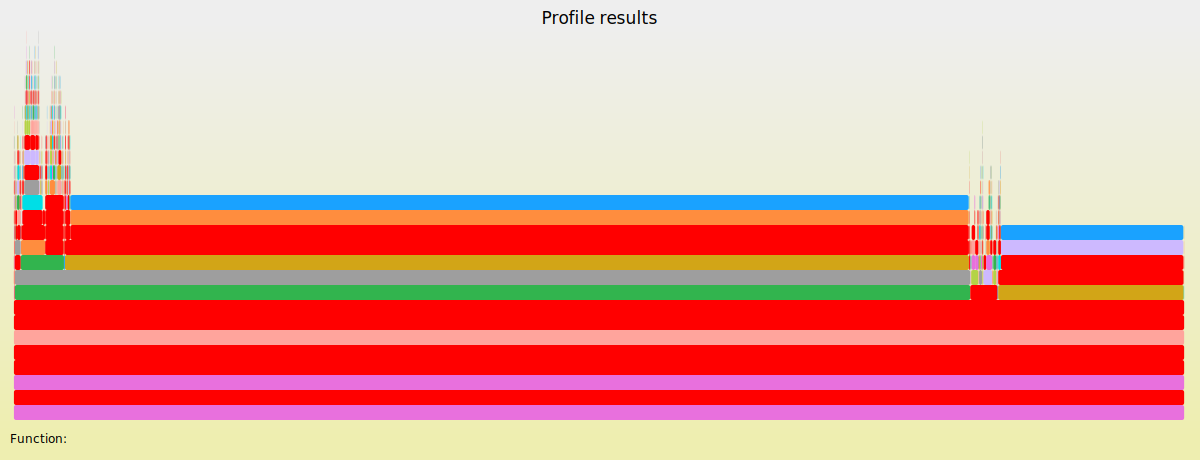

In [27]:
x0 = nominal_state(robot)
x_init = nominal_state(robot)
set_velocity!(x0, findjoint(mechanism(robot), "floating_base"), [-5, 0, 0])
results = LCPSim.simulate(x0, lqr_mpc_controller, environment(robot), 0.01, 20, mpc_params.lcp_solver);

Profile.clear()
x0 = nominal_state(robot)
x_init = nominal_state(robot)
set_velocity!(x0, findjoint(mechanism(robot), "floating_base"), [-5, 0, 0])
@time @profile LCPSim.simulate(x0, lqr_mpc_controller, environment(robot), 0.01, 20, mpc_params.lcp_solver);
ProfileView.view()

In [19]:
push!(lqr_mpc_controller.params.mip_solver.options, (:OutputFlag, 1))

5-element Array{Any,1}:
 (:OutputFlag, 0)        
 (:TimeLimit, 5)         
 (:MIPGap, 0.1)          
 (:FeasibilityTol, 0.001)
 (:OutputFlag, 1)        

In [20]:
x0 = nominal_state(robot)
x_init = nominal_state(robot)
set_velocity!(x0, findjoint(mechanism(robot), "floating_base"), [-5, 0, 0])
results = LCPSim.simulate(x0, lqr_mpc_controller, environment(robot), 0.01, 10, mpc_params.lcp_solver)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Optimize a model with 206 rows, 99 columns and 662 nonzeros
Model has 264 quadratic objective terms
Variable types: 61 continuous, 38 integer (38 binary)
Coefficient statistics:
  Matrix range     [5e-03, 2e+03]
  Objective range  [4e-15, 6e+01]
  QObjective range [4e-11, 6e+03]
  Bounds range     [5e-02, 1e+03]
  RHS range        [3e-16, 2e+03]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Loaded MIP start with objective 760.01

Presolve removed 104 rows and 13 columns
Presolve time: 0.00s
Presolved: 102 rows, 86 columns, 366 nonzeros
Presolved model has 261 quadratic objective terms
Variable types: 54 continuous, 32 integer (32 binary)

Root relaxation: objective 1.325339e+01, 202 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/N

10-element Array{LCPSim.LCPUpdate{Float64,Float64,Float64},1}:
 LCPSim.LCPUpdate{Float64,Float64,Float64}(LCPSim.StateRecord{Float64,Float64}(Spanning tree:
Vertex: world (root)
  Vertex: root, Edge: root_to_world
    Vertex: floor, Edge: root_to_floor
      Vertex: wall, Edge: floor_to_wall
    Vertex: floating_base_dummy, Edge: floating_base
      Vertex: pelvis, Edge: floating_base_dummy_to_pelvis
        Vertex: r_hand_mount_dummy, Edge: pelvis_to_r_hand_mount_rotation
          Vertex: r_hand_mount, Edge: pelvis_to_r_hand_mount_extension
        Vertex: l_hand_mount_dummy, Edge: pelvis_to_l_hand_mount_rotation
          Vertex: l_hand_mount, Edge: pelvis_to_l_hand_mount_extension
        Vertex: r_foot_sole_dummy, Edge: pelvis_to_r_foot_sole_rotation
          Vertex: r_foot_sole, Edge: pelvis_to_r_foot_sole_extension
        Vertex: l_foot_sole_dummy, Edge: pelvis_to_l_foot_sole_rotation
          Vertex: l_foot_sole, Edge: pelvis_to_l_foot_sole_extension
No non-tree joints., [-0